# PLANTS

## IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

## Création du jeux de données

Dimension de X (100, 2)
Dimension de y (100, 1)


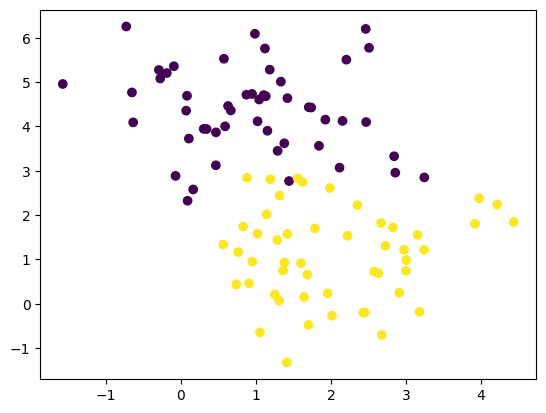

In [2]:
X, y= make_blobs(n_samples=100,n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('Dimension de X',X.shape)
print('Dimension de y',y.shape)

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

# Initialisation des parametres W et b (Weight and biais)

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1) 
    return (W, b)

# Model

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

# LOG_loss

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 -A))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [9]:
def main(X, y, learning_rate = 0.1, n_iter =1000):
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)


    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred.astype(int)))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    
    

0.94


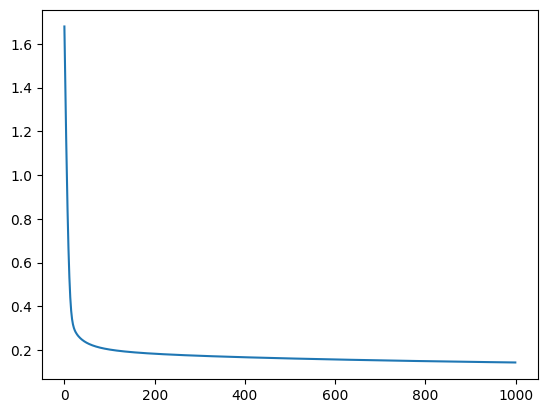

In [10]:
W, b = main(X, y)

In [11]:
new_plant = np.array([2, 1])

new_plant.shape

(2,)

la plante n'est pas venimeuse
[ True]
[0.97172516]


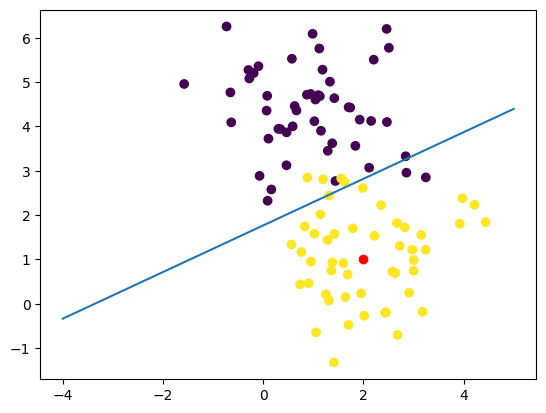

In [13]:
if predict(new_plant, W, b) is True:
    print("la plante est venimeuse")
else:
    print("la plante n'est pas venimeuse")
    
print(predict(new_plant, W, b))
print(model(new_plant, W, b))

x0 = np.linspace(-4, 5, 100)
x1 = ( -W[0] * x0 - b) / W[1]

plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1)
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()